# Tic Tac Toe Game (Noughts and Crosses)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

from gamelearner import *
python_version()

'3.6.6'

## Game dynamics

In [2]:
game = TicTacToeGame()
game

TicTacToeGame(moves=[])

In [3]:
game.roles

[1, 2]

In [4]:
game.marks

['X', 'O']

In [5]:
game.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [6]:
game.turn

1

In [7]:
game.make_move((1, (0, 2)))
game.make_move((2, (0, 1)))
game.make_move((1, (1, 1)))
game.make_move((2, (2, 2)))

In [8]:
game.show_state()

_ O X
_ X _
_ _ O


In [9]:
game.check_if_game_over()

False

In [10]:
game.show_moves()

1 (1, (0, 2))
2 (2, (0, 1))
3 (1, (1, 1))
4 (2, (2, 2))


In [11]:
game.turn

1

In [12]:
game.available_positions()

[(0, 0), (1, 0), (1, 2), (2, 0), (2, 1)]

In [13]:
try:
    game.make_move((2, (2,0)))
except ValueError as err:
    print(err)

It is not player 2's turn.


In [14]:
game.show_state()

_ O X
_ X _
_ _ O


In [15]:
game.game_over

False

In [16]:
print(game.winner)

None


In [17]:
game.reverse_move()

In [18]:
game.show_state()

_ O X
_ X _
_ _ _


In [19]:
print(game.winner)

None


In [20]:
game.make_move((2, (1,2)))
game.make_move((1, (2,0)))
game.show_state()

_ O X
_ X O
X _ _


In [21]:
game.game_over, game.winner

(True, 1)

In [22]:
try:
    game.make_move((2, (2,1)))
except AssertionError as err:
    print(err)

Player 1 has already won


### Playing with Human Players

In [23]:
players = [HumanPlayer("Jill"), HumanPlayer("Jack")]
players

[HumanPlayer('Jill')), HumanPlayer('Jack'))]

In [24]:
game = TicTacToeGame()
game

TicTacToeGame(moves=[])

In [25]:
game.show_state()
players[0].make_move(game, role=1)

_ _ _
_ _ _
_ _ _
Jill's turn (row, col): 1,1


In [26]:
game.show_state()
players[1].make_move(game, role=2)

_ _ _
_ X _
_ _ _
Jack's turn (row, col): 0,0


In [27]:
game.show_state()

O _ _
_ X _
_ _ _


## Using the game controller

In [28]:
game = TicTacToeGame()
players = [ExpertPlayer("EXP1"), ExpertPlayer("EXP2")]

In [29]:
ctrl = GameController(game, players)
ctrl

GameController(TicTacToeGame(moves=[]), [ExpertPlayer('EXP1'), ExpertPlayer('EXP2')])

In [30]:
ctrl.player_roles

{ExpertPlayer('EXP1'): 1, ExpertPlayer('EXP2'): 2}

In [31]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['EXP1', 'EXP2']
_ _ _
_ _ _
_ _ _
EXP1's turn (row, col): (1, (1, 1))
_ _ _
_ X _
_ _ _
EXP2's turn (row, col): (2, (2, 0))
_ _ _
_ X _
O _ _
EXP1's turn (row, col): (1, (0, 2))
_ _ X
_ X _
O _ _
EXP2's turn (row, col): (2, (0, 0))
O _ X
_ X _
O _ _
EXP1's turn (row, col): (1, (1, 0))
O _ X
X X _
O _ _
EXP2's turn (row, col): (2, (1, 2))
O _ X
X X O
O _ _
EXP1's turn (row, col): (1, (2, 2))
O _ X
X X O
O _ X
EXP2's turn (row, col): (2, (2, 1))
O _ X
X X O
O O X
EXP1's turn (row, col): (1, (0, 1))
O X X
X X O
O O X
Game over!
Draw


## Competition between computer players

In [32]:
game = TicTacToeGame()
players = [TDLearner('TD1'), ExpertPlayer('EXPERT')]
ctrl = GameController(game, players)

In [33]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['TD1', 'EXPERT']
_ _ _
_ _ _
_ _ _
TD1's turn (row, col): (1, 0)
_ _ _
X _ _
_ _ _
EXPERT's turn (row, col): (2, (1, 1))
_ _ _
X O _
_ _ _
TD1's turn (row, col): (2, 0)
_ _ _
X O _
X _ _
EXPERT's turn (row, col): (2, (0, 0))
O _ _
X O _
X _ _
TD1's turn (row, col): (0, 2)
O _ X
X O _
X _ _
EXPERT's turn (row, col): (2, (2, 2))
O _ X
X O _
X _ O
Game over!
EXPERT won


In [34]:
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))


Player TD1
  played: 1, wins: 0, losses: 1

Player EXPERT
  played: 1, wins: 1, losses: 0


## Train a TD Learner

In [35]:
td_learner = TDLearner('TD1')
computer_players = [td_learner, ExpertPlayer('EXPERT')]

In [36]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 573, drew 427
EXPERT: won 573, lost 0, drew 427


In [37]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 238, drew 762
EXPERT: won 238, lost 0, drew 762


## Now play against the computer!

In [38]:
game = TicTacToeGame()
players = [HumanPlayer("You"), td_learner]
ctrl = GameController(game, players)

In [39]:
while True:
    game.reset()
    ctrl.play()
    text = input("Press enter to play again or q to quit: ")
    if text.strip().lower() == 'q':
        break

print("Results")        
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))

Game of Tic Tac Toe with 2 players ['You', 'TD1']
_ _ _
_ _ _
_ _ _
You's turn (row, col): 0,0
X _ _
_ _ _
_ _ _
TD1's turn (row, col): (0, 2)
X _ O
_ _ _
_ _ _
You's turn (row, col): 1,1
X _ O
_ X _
_ _ _
TD1's turn (row, col): (2, 2)
X _ O
_ X _
_ _ O
You's turn (row, col): 1,2
X _ O
_ X X
_ _ O
TD1's turn (row, col): (1, 0)
X _ O
O X X
_ _ O
You's turn (row, col): 0,1
X X O
O X X
_ _ O
TD1's turn (row, col): (2, 1)
X X O
O X X
_ O O
You's turn (row, col): 2,0
X X O
O X X
X O O
Game over!
Draw
Press enter to play again or q to quit: q
Results

Player You
  played: 1, wins: 0, losses: 0

Player TD1
  played: 2001, wins: 0, losses: 811


## TD Parameter Optimization

In [40]:
results = {
    'learning_rate': [],
    'off_policy_rate': [],
    'Wins (1000)': [],
    'Losses (1000)': [],
    'Wins (2000)': [],
    'Losses (2000)': []
}

In [41]:
learning_rates = [0.5, 0.25, 0.1]
off_policy_rates = [0.0, 0.1]

In [42]:
for lr in learning_rates:
    for opr in off_policy_rates:
        print("\nlr: %s, opr: %s" % (str(lr), str(opr)))
        print("Training against expert...")
        td_learner = TDLearner('TD', learning_rate=lr, off_policy_rate=opr)
        computer_players = [td_learner, ExpertPlayer('EXPERT')]
        train_computer_players(computer_players, show=False)
        results['learning_rate'].append(lr)
        results['off_policy_rate'].append(opr)
        results['Wins (1000)'].append(td_learner.games_won)
        results['Losses (1000)'].append(td_learner.games_lost)
        train_computer_players(computer_players, show=False)
        results['Wins (2000)'].append(td_learner.games_won)
        results['Losses (2000)'].append(td_learner.games_lost)


lr: 0.5, opr: 0.0
Training against expert...

lr: 0.5, opr: 0.1
Training against expert...

lr: 0.25, opr: 0.0
Training against expert...

lr: 0.25, opr: 0.1
Training against expert...

lr: 0.1, opr: 0.0
Training against expert...

lr: 0.1, opr: 0.1
Training against expert...


In [43]:
results

{'learning_rate': [0.5, 0.5, 0.25, 0.25, 0.1, 0.1],
 'off_policy_rate': [0.0, 0.1, 0.0, 0.1, 0.0, 0.1],
 'Wins (1000)': [0, 0, 0, 0, 0, 0],
 'Losses (1000)': [493, 572, 497, 595, 516, 610],
 'Wins (2000)': [0, 0, 0, 0, 0, 0],
 'Losses (2000)': [547, 791, 566, 849, 572, 834]}

In [44]:
df = pd.DataFrame(results)
df

,learning_rate,off_policy_rate,Wins (1000),Losses (1000),Wins (2000),Losses (2000)
0,0.50,0.0,0,493,0,547
1,0.50,0.1,0,572,0,791
2,0.25,0.0,0,497,0,566
3,0.25,0.1,0,595,0,849
4,0.10,0.0,0,516,0,572
5,0.10,0.1,0,610,0,834


In [45]:
good_results = {
    'After 1000 iterations:': [df['Wins (1000)'].idxmax(), df['Losses (1000)'].idxmin()],
    'After 2000 iterations:': [df['Wins (2000)'].idxmax(), df['Losses (2000)'].idxmin()]
}
good_results

{'After 1000 iterations:': [0, 0], 'After 2000 iterations:': [0, 0]}

## Look at learning rates

In [12]:
td_players = [TDLearner("TD %d" % i) for i in range(4)]
rd = RandomPlayer("Random")
ex = ExpertPlayer("Expert")

opponents = [rd, ex, td_players[3]]

In [13]:
td_players[0:3], opponents

([TDLearner('TD 0'), TDLearner('TD 1'), TDLearner('TD 2')],
 [RandomPlayer('Random'), ExpertPlayer('Expert'), TDLearner('TD 3')])

In [16]:
import datetime

# This can take a long time!
start_time = datetime.datetime.now()
print(start_time)

scores = {}
n_iter = 500

def player_key(p1, p2):
    return "%s vs. %s" % (p1.name, p2.name)

for td_player, opponent in zip(td_players[0:3], opponents):
    scores[player_key(td_player, opponent)] = [test_player(td_player)]

iteration = 0
iterations = [0]

for epoch in range(250):
    
    for td_player, opponent in zip(td_players[0:3], opponents):
        
        train_computer_players([td_player, opponent], iterations=n_iter,
                               show=False)
        scores["%s vs. %s" % (td_player.name, opponent.name)].append(test_player(td_player))

    iteration += n_iter
    iterations.append(iteration)
    print(iteration, " iterations completed.")

print(datetime.datetime.now() - start_time)

2018-09-27 15:21:50.647041
500  iterations completed.
1000  iterations completed.
1500  iterations completed.
2000  iterations completed.
2500  iterations completed.
3000  iterations completed.
3500  iterations completed.
4000  iterations completed.
4500  iterations completed.
5000  iterations completed.
5500  iterations completed.
6000  iterations completed.
6500  iterations completed.
7000  iterations completed.
7500  iterations completed.
8000  iterations completed.
8500  iterations completed.
9000  iterations completed.
9500  iterations completed.
10000  iterations completed.
10500  iterations completed.
11000  iterations completed.
11500  iterations completed.
12000  iterations completed.
12500  iterations completed.
13000  iterations completed.
13500  iterations completed.
14000  iterations completed.
14500  iterations completed.
15000  iterations completed.
15500  iterations completed.
16000  iterations completed.
16500  iterations completed.
17000  iterations completed.
17500  

140500  iterations completed.
141000  iterations completed.
141500  iterations completed.
142000  iterations completed.
142500  iterations completed.
143000  iterations completed.
143500  iterations completed.
144000  iterations completed.
144500  iterations completed.
145000  iterations completed.
145500  iterations completed.
146000  iterations completed.
146500  iterations completed.
147000  iterations completed.
147500  iterations completed.
148000  iterations completed.
148500  iterations completed.
149000  iterations completed.
149500  iterations completed.
150000  iterations completed.
150500  iterations completed.
151000  iterations completed.
151500  iterations completed.
152000  iterations completed.
152500  iterations completed.
153000  iterations completed.
153500  iterations completed.
154000  iterations completed.
154500  iterations completed.
155000  iterations completed.
155500  iterations completed.
156000  iterations completed.
156500  iterations completed.
157000  it

277500  iterations completed.
278000  iterations completed.
278500  iterations completed.
279000  iterations completed.
279500  iterations completed.
280000  iterations completed.
280500  iterations completed.
281000  iterations completed.
281500  iterations completed.
282000  iterations completed.
282500  iterations completed.
283000  iterations completed.
283500  iterations completed.
284000  iterations completed.
284500  iterations completed.
285000  iterations completed.
285500  iterations completed.
286000  iterations completed.
286500  iterations completed.
287000  iterations completed.
287500  iterations completed.
288000  iterations completed.
288500  iterations completed.
289000  iterations completed.
289500  iterations completed.
290000  iterations completed.
290500  iterations completed.
291000  iterations completed.
291500  iterations completed.
292000  iterations completed.
292500  iterations completed.
293000  iterations completed.
293500  iterations completed.
294000  it

In [17]:
pd.DataFrame(scores).head()

,TD 0 vs. Random,TD 1 vs. Expert,TD 2 vs. TD 3
0,0.013312,0.016368,0.010912
1,0.056000,0.124992,0.036864
2,0.149240,0.237336,0.126000
3,0.129888,0.209088,0.085248
4,0.422136,0.254200,0.093024


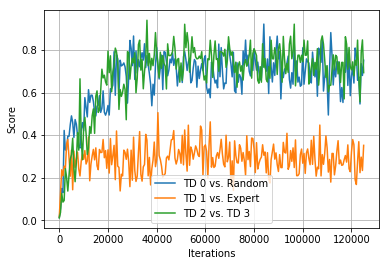

In [37]:
pd.DataFrame(scores, index=iterations).plot()
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.grid()
plt.savefig("learning_rates.pdf")